In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

In [2]:
def find_nearest(array, value):
#     time_array, value = pd.to_datetime(time_array), pd.to_datetime(value)
    idt = (np.abs(array - value)).argmin()
    value = array[idt]
    return idt, value



In [115]:
DATE = '20160924'
MAINDIR = Path('/homedata/nmpnguyen/ORACLES-ER2/Raws')
PARTTERN = f'HSRL2_ER2_{DATE}_R8.h5'
FILE = sorted(MAINDIR.glob(PARTTERN))[0]
print(FILE)
DATA = xr.open_dataset(FILE, group = 'Nav_Data')
TIME = DATA['gps_time'].values.flatten()
DATA = xr.open_dataset(FILE, group = 'DataProducts')


/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160924_R8.h5


In [116]:
DATA

<xarray.Dataset>
Dimensions:                  (phony_dim_0: 2670, phony_dim_1: 1389, phony_dim_2: 1, phony_dim_3: 701, phony_dim_4: 53398)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4
Data variables: (12/47)
    1064_aer_dep             (phony_dim_0, phony_dim_1) float64 ...
    1064_bsc                 (phony_dim_0, phony_dim_1) float64 ...
    1064_bsc_Sa              (phony_dim_0, phony_dim_1) float64 ...
    1064_bsc_cloud_screened  (phony_dim_0, phony_dim_1) float64 ...
    1064_bsr                 (phony_dim_0, phony_dim_1) float64 ...
    1064_bsr_cloud_screened  (phony_dim_0, phony_dim_1) float64 ...
    ...                       ...
    WVD_1064_532             (phony_dim_0, phony_dim_1) float64 ...
    WVD_532_355              (phony_dim_0, phony_dim_1) float64 ...
    cloud_top_height         (phony_dim_0, phony_dim_2) float64 ...
    mask_low                 (phony_dim_0, phony_dim_1) float64 ...
    trash                    (phony_dim_2, phony_dim_4) float64 ...
    trash2                   (phony_dim_2, phony_dim_4) float64 ...

In [117]:
ALT = DATA['Altitude'].values.flatten()*1e-3
ALT_AIRCRAFT = ALT[-1]

In [118]:
ATB_532 = DATA['532_total_attn_bsc'].values
ATB_355 = DATA['355_total_attn_bsc'].values

Text(0, 0.5, 'ALTITUDE,km')

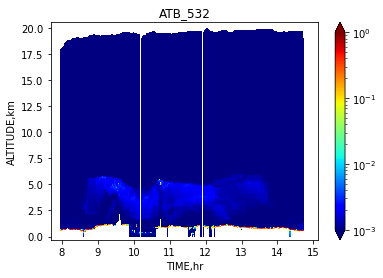

In [22]:
plt.pcolormesh(TIME, ALT, ATB_532.T, norm=LogNorm(vmin=1e-3, vmax=1e0), shading='auto', cmap='jet')
plt.colorbar(extend='both')
plt.title("ATB_532")
plt.xlabel('TIME,hr')
plt.ylabel('ALTITUDE,km')


Text(0, 0.5, 'ALTITUDE,km')

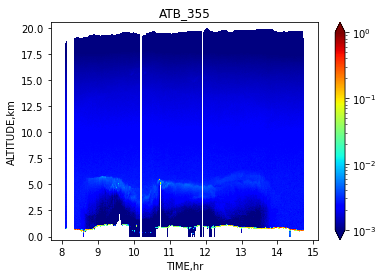

In [23]:
plt.pcolormesh(TIME, ALT, ATB_355.T, norm=LogNorm(vmin=1e-3, vmax=1e0), shading='auto', cmap='jet')
plt.colorbar(extend='both')
plt.title("ATB_355")
plt.xlabel('TIME,hr')
plt.ylabel('ALTITUDE,km')

In [119]:
NUMB_DENSITY = xr.open_dataset(FILE, group = 'State')['Number_Density'].values
DIFF_CROSS_SECTION = {'532' : 6.1668318e-32, '355' : 3.2897988e-31, 'unit' : 'm^2.sr^-1'}
BETA_MOL_355 = DIFF_CROSS_SECTION['355']*NUMB_DENSITY * 1e3
BETA_MOL_532 = DIFF_CROSS_SECTION['532']*NUMB_DENSITY * 1e3
ALPHA_MOL_355 = (math.pi*4/1.5) * BETA_MOL_355
ALPHA_MOL_532 = (math.pi*4/1.5) * BETA_MOL_532

In [120]:
BETA_PART_355 = DATA['355_bsc'].values
BETA_PART_532 = DATA['532_bsc'].values
ALPHA_PART_355 = DATA['355_ext'].values
ALPHA_PART_532 = DATA['532_ext'].values

In [121]:
# AOT_355 = DATA['355_AOT_hi'].to_dataframe()
# AOT_355['flags'] = 0
# AOT_355.loc[AOT_355['355_AOT_hi'] < 0.1, 'flags'] = 1
# AOT_355.loc[(AOT_355['355_AOT_hi'] >= 0.1) & (AOT_355['355_AOT_hi'] < 0.5), 'flags'] = 2
# AOT_355.loc[(AOT_355['355_AOT_hi'] >= 0.5) & (AOT_355['355_AOT_hi'] < 1), 'flags'] = 3
# AOT_355.loc[AOT_355['355_AOT_hi'] >= 1, 'flags'] = 4

AOT_355 = [DATA['355_AOT_hi_col'].values, np.full(DATA['355_AOT_hi_col'].values.shape, 0)]
AOT_355[1][AOT_355[0] < 0.1] = 1
AOT_355[1][(AOT_355[0] >= 0.1) & (AOT_355[0] < 0.5)] = 2
AOT_355[1][(AOT_355[0] >= 0.5) & (AOT_355[0] < 1)] = 3
AOT_355[1][AOT_355[0] > 1] = 4
AOT_355

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [122]:
# Etude 22/2 : mettre les AOT : Nan -> 0 si au-dessus AOT Not-Nan, 
# AOT : Nan -> Nan si au dessous les AOT Not-Nan

# 1. Filtrer la position des AOT Not-Nan
aot355_hi_col = DATA['355_AOT_hi_col'].values
aotp_not_nan = np.unique(np.where(~np.isnan(DATA['355_AOT_hi_col'].values))[0])
print(aotp_not_nan)

# np.where(~np.isnan(aot355_hi_col[aotp_not_nan[0]]))

[ 254  255  256 ... 2512 2513 2514]


In [123]:
# à chaque profil, trouver la position top de valeur non-NaN au-dessus laquelle tous les Nan deviennent 0 
for i in aotp_not_nan :
    pmax = np.where(~np.isnan(aot355_hi_col[i]))[0].max()
    aot355_hi_col[i][pmax:]=0
    
aot355_hi_col[np.where(np.isnan(aot355_hi_col).all(axis=1))[0],:]=0

In [12]:
aot355_hi_col.shape, DATA['355_AOT_hi_col'].values.shape

((2670, 1389), (2670, 1389))

<ipython-input-66-de8307cfc7f9>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(TIME, ALT, aot355_hi_col.T, cmap='turbo')


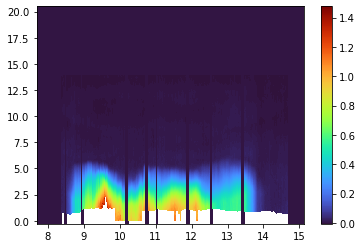

In [66]:
# plt.plot(aot355_hi_col[aotp_not_nan[30]], ALT)
# plt.ylim(ALT[0], ALT[-1])

plt.pcolormesh(TIME, ALT, aot355_hi_col.T, cmap='turbo')
plt.colorbar()

In [65]:
aotp_not_nan.shape, TIME.shape

((2092,), (2670,))

In [63]:
np.where(np.isnan(aot355_hi_col).all(axis=1))[0].shape

(578,)

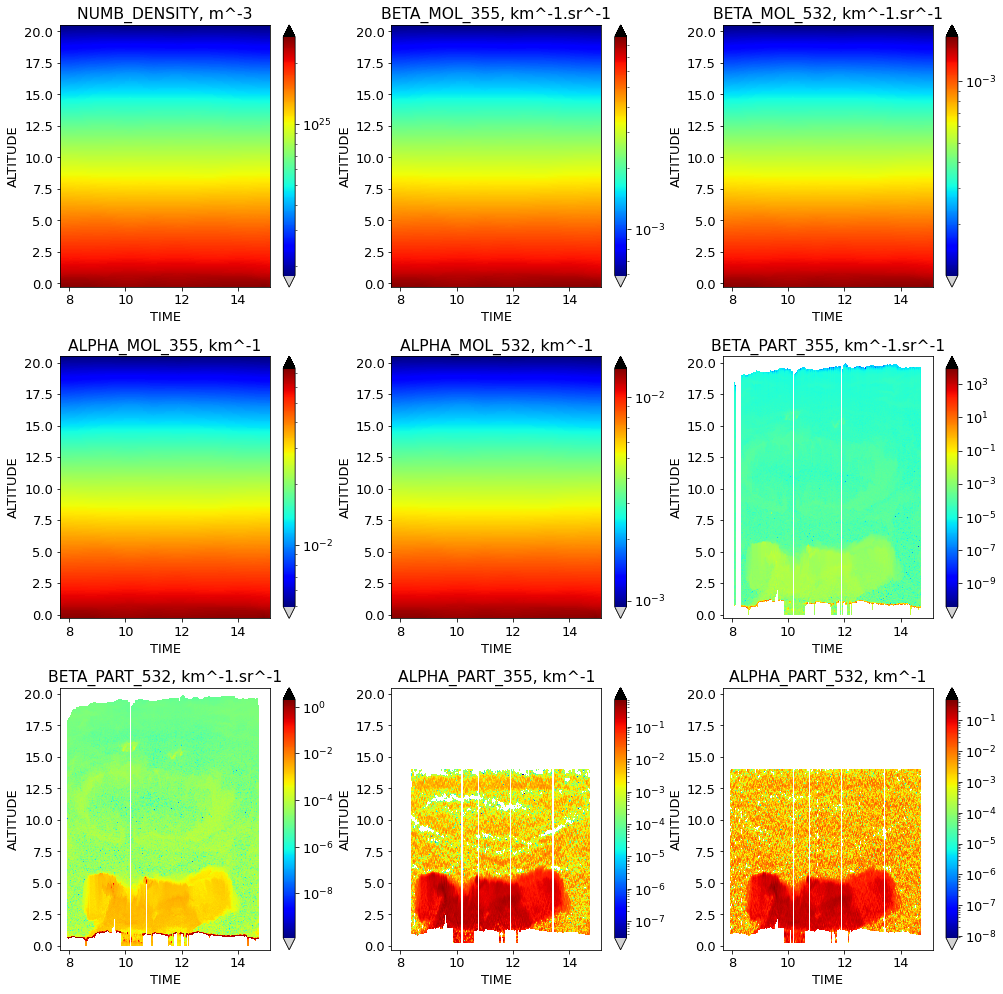

In [124]:
LIST_VARIABLES = {'NUMB_DENSITY, m^-3' : NUMB_DENSITY, 
                  'BETA_MOL_355, km^-1.sr^-1' : BETA_MOL_355, 
                  'BETA_MOL_532, km^-1.sr^-1' : BETA_MOL_532, 
                  'ALPHA_MOL_355, km^-1' : ALPHA_MOL_355, 
                  'ALPHA_MOL_532, km^-1' : ALPHA_MOL_532, 
                  'BETA_PART_355, km^-1.sr^-1' : BETA_PART_355, 
                  'BETA_PART_532, km^-1.sr^-1' : BETA_PART_532, 
                  'ALPHA_PART_355, km^-1' : ALPHA_PART_355, 
                  'ALPHA_PART_532, km^-1' : ALPHA_PART_532}
KEYS = [key for key in LIST_VARIABLES.keys()]

fig, axs = plt.subplots(nrows =3, ncols=3, figsize=(14,14))
plt.rcParams['font.size'] = 13
# plt.rcParams['xtick.labelsize'] = 'large'
# plt.rcParams['ytick.labelsize'] = 'large'
for i, ax in enumerate(axs.flat):
    P = ax.pcolormesh(TIME, ALT, LIST_VARIABLES[KEYS[i]].T, norm=LogNorm(), shading='auto', cmap='jet')
    plt.colorbar(P, ax=ax, extend='both')
    ax.set_title(f'{KEYS[i]}')
    ax.set_xlabel('TIME')
    ax.set_ylabel('ALTITUDE')
    
plt.tight_layout()

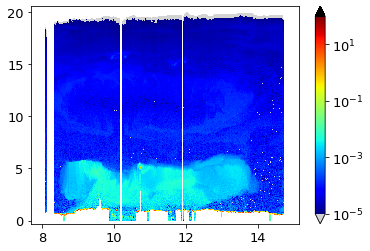

In [125]:
BETA1 = (BETA_MOL_532 + BETA_PART_355)/BETA_MOL_532

plt.pcolormesh(TIME, ALT, BETA_PART_355.T, shading='auto', norm=LogNorm(vmin=1e-5, vmax=1e2), cmap='jet')
plt.colorbar(extend='both')

In [126]:
len_time = TIME.shape[0]
len_alt = ALT.shape[0]

MULTI_SCATTERING_COEFF = 0.9
t = 20
INTEG1, INTEG2 = np.full(ALPHA_MOL_355.shape, np.nan), np.full(ALPHA_MOL_355.shape, np.nan)
for a in range(len_alt):
#     print(ALT[a]-ALT_AIRCRAFT)
    INTEG1[:,a] = -2 * np.nansum(np.dstack((ALPHA_MOL_532[:,a] , ALPHA_PART_355[:,a] * MULTI_SCATTERING_COEFF)),2) * np.abs(ALT[a]-ALT_AIRCRAFT)
#     INTEG1[:,a] = -2 * (ALPHA_MOL_532[:,a] + ALPHA_PART_355[:,a]*MULTI_SCATTERING_COEFF) * np.abs(ALT[a]-ALT_AIRCRAFT)
    INTEG2[:,a] = -2 * ALPHA_MOL_532[:,a] * np.abs(ALT[a]-ALT_AIRCRAFT)

In [130]:

np.nansum(np.dstack((ALPHA_MOL_532 , ALPHA_PART_355 * MULTI_SCATTERING_COEFF)),2)
ALPHA_PART_355.shape
# plt.pcolormesh(TIME, ALT, (np.nansum(np.dstack((ALPHA_MOL_532 , ALPHA_PART_355 * MULTI_SCATTERING_COEFF)),2)).T, norm=LogNorm(),shading='auto', cmap='jet')
# # plt.pcolormesh(TIME, ALT, np.exp(INTEG1).T, norm=LogNorm(), shading='auto', cmap='jet')
# plt.colorbar(extend='both')
# plt.title("INTEG1")
# plt.xlabel('TIME,hr')
# plt.ylabel('ALTITUDE,km')

(2670, 1389)

Text(0, 0.5, 'ALTITUDE,km')

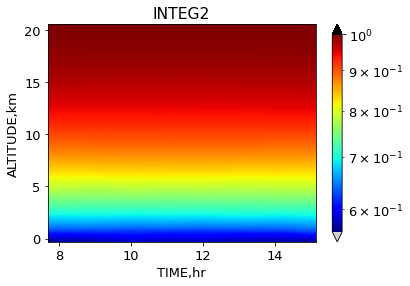

In [131]:
plt.pcolormesh(TIME, ALT, np.exp(INTEG2).T, norm=LogNorm(), shading='auto', cmap='jet')
plt.colorbar(extend='both')
plt.title("INTEG2")
plt.xlabel('TIME,hr')
plt.ylabel('ALTITUDE,km')

Text(0, 0.5, 'ALTITUDE,km')

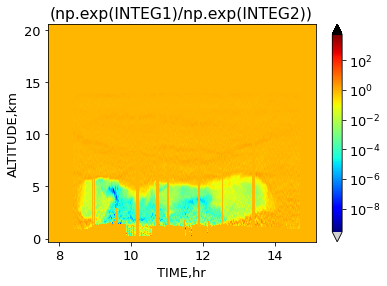

In [132]:
plt.pcolormesh(TIME, ALT, (np.exp(INTEG1)/np.exp(INTEG2)).T, norm=LogNorm(), shading='auto', cmap='jet')
plt.colorbar(extend='both')
plt.title("(np.exp(INTEG1)/np.exp(INTEG2))")
plt.xlabel('TIME,hr')
plt.ylabel('ALTITUDE,km')

In [127]:
SR532_NEW = BETA1 * np.exp(INTEG1)/np.exp(INTEG2)

Text(0, 0.5, 'ALTITUDE,km')

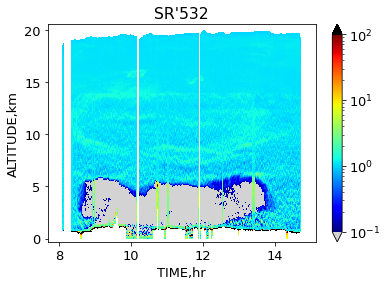

In [134]:
plt.pcolormesh(TIME, ALT, SR532_NEW.T, norm=LogNorm(vmin=1e-1, vmax=1e2), shading='auto', cmap = 'jet')
plt.colorbar(extend='both')
plt.title("SR'532")
plt.xlabel('TIME,hr')
plt.ylabel('ALTITUDE,km')

In [110]:
MAINDIR = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/')
PARTTERN = f'HSRL2_ER2_{DATE}*_v2.nc'
FILE = sorted(MAINDIR.glob(PARTTERN))[0]
print(FILE)
DATA = xr.open_dataset(FILE)
SR355 = (DATA['calibrated']/DATA['molecular']).sel(wavelength = 355).values
SR532 = (DATA['calibrated']/DATA['molecular']).sel(wavelength = 532).values
# TIME = np.intersect1d(np.intersect1d(SR355.time, DATA.time), np.intersect1d(SR532.time, DATA.time))#DATA['time'].values
ALTITUDE = DATA['altitude'].values/1000 #(km)

# SR355 = SR355.sel(time = TIME)
# SR532 = SR532.sel(time = TIME)

/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160924_R8_v2.nc


<ipython-input-144-ef28ba463d84>:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_over('black')
<ipython-input-144-ef28ba463d84>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_under('lightgrey')
<ipython-input-144-ef28ba463d84>:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.

Text(0, 0.5, 'ALTITUDE,km')

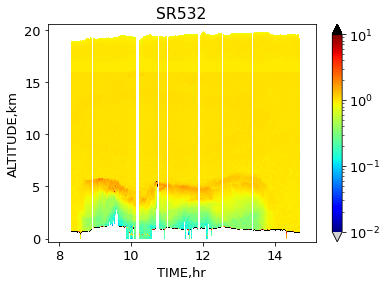

In [144]:
SR532_NEW = np.ma.masked_where(SR532_NEW<0, SR532_NEW)
SR355 = np.ma.masked_where(SR355<0, SR355)

cmapp = mpl.cm.get_cmap("jet")
cmapp.set_over('black')
cmapp.set_under('lightgrey')
cmapp.set_bad('white')
plt.rcParams['font.size'] = 13


plt.pcolormesh(TIME, ALT, SR355.T, norm=LogNorm(vmin=1e-2, vmax=1e1), shading='auto', cmap = 'jet')
plt.colorbar(extend='both')
plt.title("SR532")
plt.xlabel('TIME,hr')
plt.ylabel('ALTITUDE,km')

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


MAE = mean_absolute_error(SR532.ravel()[np.logical_and(np.isfinite(SR532.ravel()), np.isfinite(SR532_NEW.ravel()))], SR532_NEW.ravel()[np.logical_and(np.isfinite(SR532.ravel()), np.isfinite(SR532_NEW.ravel()))])
MSE = mean_squared_error(SR532.ravel()[np.logical_and(np.isfinite(SR532.ravel()), np.isfinite(SR532_NEW.ravel()))], SR532_NEW.ravel()[np.logical_and(np.isfinite(SR532.ravel()), np.isfinite(SR532_NEW.ravel()))])
R2 = np.corrcoef(SR532.ravel()[np.logical_and(np.isfinite(SR532.ravel()), np.isfinite(SR532_NEW.ravel()))], SR532_NEW.ravel()[np.logical_and(np.isfinite(SR532.ravel()), np.isfinite(SR532_NEW.ravel()))])
print(MAE, MSE, R2[0, 1])

13.907145494389995 21988711.846376915 0.01637940664986043


In [152]:
masks.size == 0

True

<ipython-input-251-da77442493e4>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_over('black')
<ipython-input-251-da77442493e4>:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_under('lightgrey')


<Figure size 432x288 with 0 Axes>

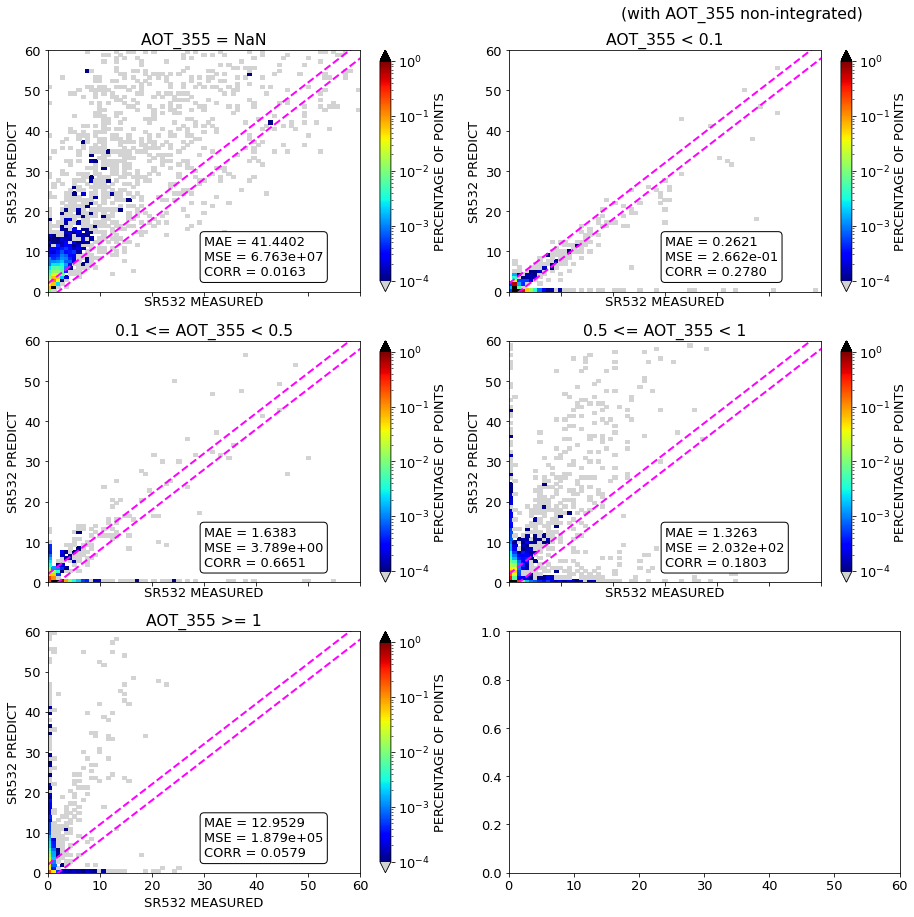

In [251]:
import matplotlib as mpl

plt.clf()
FIG, AXS= plt.subplots(nrows=3, ncols=2, figsize=(13,13), sharex=True)
cmapp = mpl.cm.get_cmap("jet")
cmapp.set_over('black')
cmapp.set_under('lightgrey')
plt.rcParams['font.size'] = 13
# plt.rcParams['xtick.labelsize'] = 'large'
RANGES = [[0, 80], [0, 80]]
BINS = 100
flags = {
    '0' : 'AOT_355 = NaN',
    '1' : 'AOT_355 < 0.1',
    '2' : '0.1 <= AOT_355 < 0.5',
    '3' : '0.5 <= AOT_355 < 1',
    '4' : 'AOT_355 >= 1'
}

for (i, AX), flag in zip(enumerate(AXS.flat), [0,1,2,3,4]):
    #--------------------------------------------------
    # BY FUNCTION
    #--------------------------------------------------
    # if use AOT_355_hi
#     COUNTS, XBINS, YBINS = np.histogram2d(SR532[np.where(AOT_355['flags']==flag), :].ravel(), SR532_NEW[np.where(AOT_355['flags']==flag), :].ravel(), range = RANGES, bins = BINS)
    # if use AOT_355_hi_col
    COUNTS, XBINS, YBINS = np.histogram2d(SR532[np.where(AOT_355[1]==flag)].ravel(), SR532_NEW[np.where(AOT_355[1]==flag)].ravel(), range = RANGES, bins = BINS)
    COUNTS_PROPA = 100*COUNTS/SR532.ravel()[~np.isnan(SR532.ravel())].shape[0]
    PP = AX.pcolormesh(XBINS, YBINS, COUNTS_PROPA.T, cmap = cmapp, norm=LogNorm(vmin=1e-4, vmax=1e0))
    CC = plt.colorbar(PP, ax=AX, label = 'PERCENTAGE OF POINTS', extend='both')
    AX.set_xlabel('SR532 MEASURED')
    AX.set_ylabel('SR532 PREDICT')
    AX.set_title(f'{flags[str(flag)]}')
    AX.plot(np.arange(0,80,1), np.arange(0+2,80+2,1), linestyle='--', c='magenta', linewidth=2)
    AX.plot(np.arange(0,80,1), np.arange(0-2,80-2,1), linestyle='--', c='magenta', linewidth=2)
    AX.set_ylim(0,60)
    AX.set_xlim(0,60)
    #--------------------------------------------------
    # METRICS
    #--------------------------------------------------
    # if use AOT_355_hi
#     masks = np.logical_and(np.isfinite(SR532[np.where(AOT_355['flags']==flag), :].ravel()), np.isfinite(SR532_NEW[np.where(AOT_355['flags']==flag), :].ravel()))
#     if (masks.size != 0) :
#         MAE = mean_absolute_error(SR532[np.where(AOT_355['flags']==flag), :].ravel()[masks], SR532_NEW[np.where(AOT_355['flags']==flag), :].ravel()[masks])
#         MSE = mean_squared_error(SR532[np.where(AOT_355['flags']==flag), :].ravel()[masks], SR532_NEW[np.where(AOT_355['flags']==flag), :].ravel()[masks])
#         R2 = np.corrcoef(SR532[np.where(AOT_355['flags']==flag), :].ravel()[masks], SR532_NEW[np.where(AOT_355['flags']==flag), :].ravel()[masks])

#         AX.annotate(f'MAE = {MAE:.4f}\nMSE = {MSE:.3e}\nCORR = {R2[0,1]:.4f}', xy=(30, 4), xytext=(30, 4), bbox=dict(boxstyle="round", fc="w"))
    # if use AOT_355_hi_col
    masks = np.logical_and(np.isfinite(SR532[np.where(AOT_355[1]==flag)].ravel()), np.isfinite(SR532_NEW[np.where(AOT_355[1]==flag)].ravel()))
    if (masks.size != 0) :
        MAE = mean_absolute_error(SR532[np.where(AOT_355[1]==flag)].ravel()[masks], SR532_NEW[np.where(AOT_355[1]==flag)].ravel()[masks])
        MSE = mean_squared_error(SR532[np.where(AOT_355[1]==flag)].ravel()[masks], SR532_NEW[np.where(AOT_355[1]==flag)].ravel()[masks])
        R2 = np.corrcoef(SR532[np.where(AOT_355[1]==flag)].ravel()[masks], SR532_NEW[np.where(AOT_355[1]==flag)].ravel()[masks])

        AX.annotate(f'MAE = {MAE:.4f}\nMSE = {MSE:.3e}\nCORR = {R2[0,1]:.4f}', xy=(30, 4), xytext=(30, 4), bbox=dict(boxstyle="round", fc="w"))

plt.suptitle('(with AOT_355 non-integrated)', x = 0.8)
plt.tight_layout()

<ipython-input-143-5acaa13d38eb>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_over('black')
<ipython-input-143-5acaa13d38eb>:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_under('lightgrey')


<Figure size 432x288 with 0 Axes>

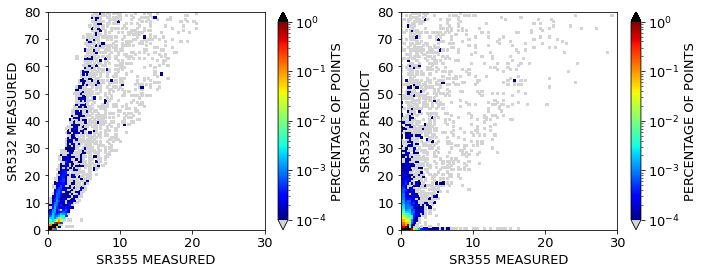

In [143]:

plt.clf()
FIG, (AX, AX2)= plt.subplots(ncols = 2, figsize=(10,4))
cmapp = mpl.cm.get_cmap("jet")
cmapp.set_over('black')
cmapp.set_under('lightgrey')
plt.rcParams['font.size'] = 13
# plt.rcParams['xtick.labelsize'] = 'large'
RANGES = [[0, 30], [0, 80]]
BINS = 100
#--------------------------------------------------
# ONLY MEASUREMENTS
#--------------------------------------------------
COUNTS, XBINS, YBINS = np.histogram2d(SR355.ravel(), SR532.ravel(), range = RANGES, bins = BINS)
COUNTS_PROPA = 100*COUNTS/SR532.ravel()[~np.isnan(SR532.ravel())].shape[0]
PP = AX.pcolormesh(XBINS, YBINS, COUNTS_PROPA.T, cmap = cmapp, norm=LogNorm(vmin=1e-4, vmax=1e0))
CC = plt.colorbar(PP, ax=AX, label = 'PERCENTAGE OF POINTS', extend='both')
AX.set_xlabel('SR355 MEASURED')
AX.set_ylabel('SR532 MEASURED')
# AX.set_title("METHOD ARTEM'S EQUATION")
# AX.plot(np.arange(0,80,1), np.arange(0+2,80+2,1), linestyle='--', c='magenta', linewidth=2)
# AX.plot(np.arange(0,80,1), np.arange(0-2,80-2,1), linestyle='--', c='magenta', linewidth=2)
# AX.set_ylim(0,60)
AX.set_xlim(0,30)
# AX.annotate(f'MAE = {MAE:.3f}\nMSE = {MSE:.3f}\nCORR = {R2[0,1]:.3f}', xy=(5, 48), xytext=(5, 48), bbox=dict(boxstyle="round", fc="w"))

#--------------------------------------------------
# WITH CONVERT SIGNAL
#--------------------------------------------------
COUNTS, XBINS, YBINS = np.histogram2d(SR355.ravel(), SR532_NEW.ravel(), range = RANGES, bins = BINS)
COUNTS_PROPA = 100*COUNTS/SR532.ravel()[~np.isnan(SR532.ravel())].shape[0]
PP = AX2.pcolormesh(XBINS, YBINS, COUNTS_PROPA.T, cmap = cmapp, norm=LogNorm(vmin=1e-4, vmax=1e0))
CC = plt.colorbar(PP, ax=AX2, label = 'PERCENTAGE OF POINTS', extend='both')
AX2.set_xlabel('SR355 MEASURED')
AX2.set_ylabel('SR532 PREDICT')
AX2.set_xlim(0,30)
# AX2.set_title("METHOD ARTEM'S EQUATION")

plt.tight_layout()


## QUANTIFY ALL DATASET
-------------------------------

APPLYING FOR ALL DATASET: 

    /homedata/nmpnguyen/ORACLES-ER2/leaning_model_test/Codes/prediction_by_Artem_equation_total_dataset.py 
    
    /homedata/nmpnguyen/ORACLES-ER2/leaning_model_test/Codes/compare_convert_by_Artem_equation_total_dataset.py 
    

In [73]:

import os
os.chdir('/homedata/nmpnguyen/comparaison/Codes')
from fonctions import dataset, conditions, get_file, check, conversion, plots


MAINDIR = Path('/homedata/nmpnguyen/ORACLES-ER2/leaning_model_test/Products/')
SR532s = pd.read_pickle(Path(MAINDIR, 'TOTAL_SR532_ravel.pkl')).values
SR532_NEWs = pd.read_pickle(Path(MAINDIR, 'TOTAL_SR532_CONVERT_ravel_by_ARTEM_FUNCTION.pkl')).values
TIMEs = pd.read_pickle(Path(MAINDIR, 'TIME.pkl')).values


In [ ]:
print('----------------QUANTIFY--------------------')
UNIT_VALUE = np.arange(0.05, 2, 0.2)
MIN_MAX_VALUE = [0.0,80.0]
PTS_STATS3 = []


for u in UNIT_VALUE:
    PTS = check(min_value_x=MIN_MAX_VALUE[0], min_value_y=MIN_MAX_VALUE[0], max_value_x=MIN_MAX_VALUE[1], max_value_y=MIN_MAX_VALUE[1], 
                closed_unit = u, x_data=SR532s.ravel(), y_data=SR532_NEWs.ravel())
    PTS_STATS3.append(PTS.quantify())
    print(f'Quantify predicted data within +/- {u} unit around the diagonal and between {MIN_MAX_VALUE}: {PTS.quantify()} %')
#     DF_PTS2.append(SR532[np.where(PTS.check_point())[0]].reshape(-1,1))
   

In [5]:
MAINDIR = Path('/homedata/nmpnguyen/ORACLES-ER2/leaning_model_test/Products/')
PTS_STATSo = pd.read_pickle(Path(MAINDIR, f'LogFunction-HSRL2-ER2-Stats_between_{MIN_MAX_VALUE[0]}_{MIN_MAX_VALUE[1]}.pkl'))[0]
PTS_STATSo2 = pd.read_pickle(Path(MAINDIR, f'LinearFunction-HSRL2-ER2-Stats_between_{MIN_MAX_VALUE[0]}_{MIN_MAX_VALUE[1]}.pkl'))[0]
PTS_STATS_TREEo = pd.read_pickle(Path(MAINDIR, f'tree_3f-HSRL2-ER2-Stats_between_{MIN_MAX_VALUE[0]}_{MIN_MAX_VALUE[1]}.pkl'))[0]
PTS_STATS_TREEo2 = pd.read_pickle(Path(MAINDIR, f'tree_2f-HSRL2-ER2-Stats_between_{MIN_MAX_VALUE[0]}_{MIN_MAX_VALUE[1]}.pkl'))[0]

(0.0, 100.0)

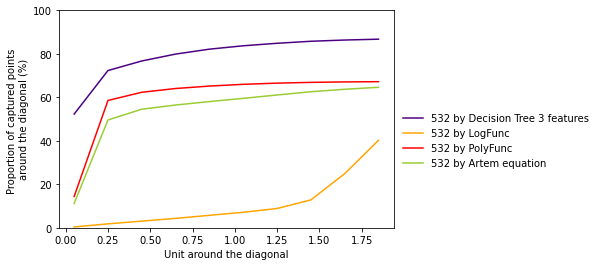

In [6]:
#--------------------------------------------------
# QUANTIFY LINE 
#--------------------------------------------------
LEGENDS_STRING = {'green' : '532 Obs',
                 'orange' : '532 by LogFunc',
                 'red' : '532 by PolyFunc',
                 'violet' : '532 by Decision Tree 2 features',
                 'indigo' : '532 by Decision Tree 3 features',
                 'yellowgreen' : '532 by Artem equation'}

FIG, AX3 = plt.subplots()
plt.rcParams['font.size'] = 13
AX3.plot(UNIT_VALUE, PTS_STATS_TREEo, color='indigo', label=LEGENDS_STRING['indigo'])
AX3.plot(UNIT_VALUE, PTS_STATSo, color='orange', label=LEGENDS_STRING['orange'])
# AX3.plot(UNIT_VALUE, PTS_STATS_TREEo2, color='violet', label=LEGENDS_STRING['violet'])
AX3.plot(UNIT_VALUE, PTS_STATSo2, color='red', label=LEGENDS_STRING['red'])
AX3.plot(UNIT_VALUE, PTS_STATS3, color='yellowgreen', label=LEGENDS_STRING['yellowgreen'])
AX3.legend(loc='center left', bbox_to_anchor=(1, 0.4), frameon=False)
AX3.set_ylabel('Proportion of captured points \naround the diagonal (%)')
AX3.set_xlabel('Unit around the diagonal')
AX3.set_ylim(0,100)

0.45380421866673876 2.632233875982282 0.773905577011519


<ipython-input-109-8887130c9f1e>:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_over('black')
<ipython-input-109-8887130c9f1e>:18: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_under('lightgrey')


Text(28, 4, 'MAE = 0.454\nMSE = 2.632e+00\nCORR = 0.774')

<Figure size 432x288 with 0 Axes>

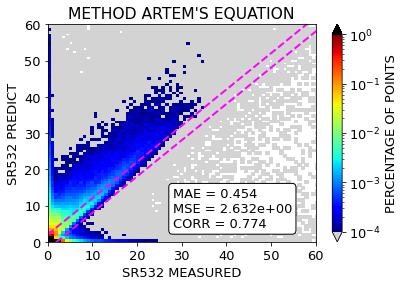

In [109]:
import matplotlib as mpl
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


VALIDE_MASK = np.logical_and(np.isfinite(SR532s), np.isfinite(SR532_NEWs))
SR532s_MASK = SR532s[VALIDE_MASK]
SR532_NEWs_MASK = SR532_NEWs[VALIDE_MASK]
RANGE_MASK = np.where((SR532s_MASK >= RANGES[0][0]) & (SR532s_MASK <= RANGES[0][1]) & (SR532_NEWs_MASK >= RANGES[1][0]) & (SR532_NEWs_MASK <= RANGES[1][1]))
MAE = mean_absolute_error(SR532s_MASK[RANGE_MASK], SR532_NEWs_MASK[RANGE_MASK])
MSE = mean_squared_error(SR532s_MASK[RANGE_MASK], SR532_NEWs_MASK[RANGE_MASK])
R2 = np.corrcoef(SR532s_MASK[RANGE_MASK], SR532_NEWs_MASK[RANGE_MASK])
print(MAE, MSE, R2[0, 1])

plt.clf()
FIG, AX= plt.subplots()
cmapp = mpl.cm.get_cmap("jet")
cmapp.set_over('black')
cmapp.set_under('lightgrey')
plt.rcParams['font.size'] = 13
# plt.rcParams['xtick.labelsize'] = 'large'
RANGES = [[0, 80], [0, 80]]
BINS = 100
#--------------------------------------------------
# BY FUNCTION
#--------------------------------------------------
COUNTS, XBINS, YBINS = np.histogram2d(SR532s.flatten(), SR532_NEWs.flatten(), range = RANGES, bins = BINS)
COUNTS_PROPA = 100*COUNTS/SR532s[~np.isnan(SR532s)].shape[0]
PP = AX.pcolormesh(XBINS, YBINS, COUNTS_PROPA.T, cmap = cmapp, norm=LogNorm(vmin=1e-4, vmax=1e0))
CC = plt.colorbar(PP, ax=AX, label = 'PERCENTAGE OF POINTS', extend='both')
AX.set_xlabel('SR532 MEASURED')
AX.set_ylabel('SR532 PREDICT')
AX.set_title("METHOD ARTEM'S EQUATION")
AX.plot(np.arange(0,80,1), np.arange(0+2,80+2,1), linestyle='--', c='magenta', linewidth=2)
AX.plot(np.arange(0,80,1), np.arange(0-2,80-2,1), linestyle='--', c='magenta', linewidth=2)
AX.set_ylim(0,60)
AX.set_xlim(0,60)
AX.annotate(f'MAE = {MAE:.3f}\nMSE = {MSE:.3e}\nCORR = {R2[0,1]:.3f}', xy=(28, 4), xytext=(28, 4), bbox=dict(boxstyle="round", fc="w"))


In [35]:
# get all AOT_355 et set flags 

MAINDIR = Path('/homedata/nmpnguyen/ORACLES-ER2/Raws')
PARTTERN = f'HSRL2_ER2_*_R8.h5'
AOT_355s = []
AOT_355s_col = []
for FILE in sorted(MAINDIR.glob(PARTTERN)):
    print(FILE)
    DATA = xr.open_dataset(FILE, group = 'Nav_Data')
    TIME = DATA['gps_time'].values.flatten()
    DATA = xr.open_dataset(FILE, group = 'DataProducts')
    ALT = DATA['Altitude'].values.flatten()*1e-3
    # if use AOT_hi
    #--------------
#     AOT_355 = DATA['355_AOT_hi'].to_dataframe()
#     AOT_355['flags'] = 0
#     AOT_355.loc[AOT_355['355_AOT_hi'] < 0.1, 'flags'] = 1
#     AOT_355.loc[(AOT_355['355_AOT_hi'] >= 0.1) & (AOT_355['355_AOT_hi'] < 0.5), 'flags'] = 2
#     AOT_355.loc[(AOT_355['355_AOT_hi'] >= 0.5) & (AOT_355['355_AOT_hi'] < 1), 'flags'] = 3
#     AOT_355.loc[AOT_355['355_AOT_hi'] >= 1, 'flags'] = 4
#     AOT_355s.append(pd.concat([AOT_355['flags']]*ALT.shape[0], axis=1, ignore_index=True).values.ravel())
    AOT_355 = DATA['355_AOT_hi'].values
    AOT_355s.append(np.tile(DATA['355_AOT_hi'].values, ALT.shape[0]).ravel())
    # if use AOT_hi_col
    #------------------
    AOT_355 = [DATA['355_AOT_hi_col'].values, np.full(DATA['355_AOT_hi_col'].values.shape, 0)]
#     AOT_355[1][AOT_355[0] < 0.1] = 1
#     AOT_355[1][(AOT_355[0] >= 0.1) & (AOT_355[0] < 0.5)] = 2
#     AOT_355[1][(AOT_355[0] >= 0.5) & (AOT_355[0] < 1)] = 3
#     AOT_355[1][AOT_355[0] > 1] = 4
#     AOT_355s.append(AOT_355[1].ravel())
    AOT_355s_col.append(AOT_355[0].ravel())

/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160819_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160823_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160826_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160912_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160916_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160918_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160920_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160922_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160924_R8.h5


In [36]:
# AOT_355s = pd.concat(AOT_355s)
AOT_355s = np.concatenate(AOT_355s)
AOT_355s_col = np.concatenate(AOT_355s_col)
AOT_355s.shape, AOT_355s_col.shape

((28888207,), (28888207,))

Text(0.5, 0, '355_AOT_hi')

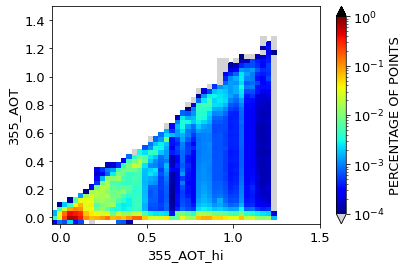

In [30]:
FIG, AX = plt.subplots()
COUNTS, XBINS, YBINS = np.histogram2d(AOT_355s, AOT_355s_col, range=[[-0.05, 1.5], [-0.05, 1.5]], bins=50)
COUNTS_PROPA = 100*COUNTS/AOT_355s_col.shape[0]
PP = AX.pcolormesh(XBINS, YBINS, COUNTS_PROPA.T, cmap = cmapp, norm=LogNorm(vmin=1e-4, vmax=1e0))
CC = plt.colorbar(PP, ax=AX, label = 'PERCENTAGE OF POINTS', extend='both')
AX.set_ylabel('355_AOT')
AX.set_xlabel('355_AOT_hi')

([<matplotlib.axis.XTick at 0x7f4a58fc7370>,
 [Text(0, 0, 'NaN'),
  Text(1, 0, '(-Inf, 0.1]'),
  Text(2, 0, '[0.1, 0.5)'),
  Text(3, 0, '[0.5, 1)'),
  Text(4, 0, '[1, Inf)')])

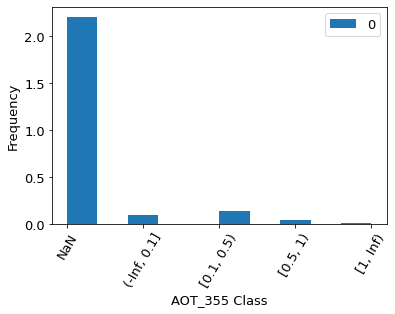

In [267]:
pd.DataFrame(AOT_355s).plot.hist(density=True)
plt.xlabel('AOT_355 Class')
plt.xticks([0,1,2,3,4],['NaN', '(-Inf, 0.1]', '[0.1, 0.5)', '[0.5, 1)', '[1, Inf)'], rotation=60)

<ipython-input-268-9e32f2f2937f>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_over('black')
<ipython-input-268-9e32f2f2937f>:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_under('lightgrey')


<Figure size 432x288 with 0 Axes>

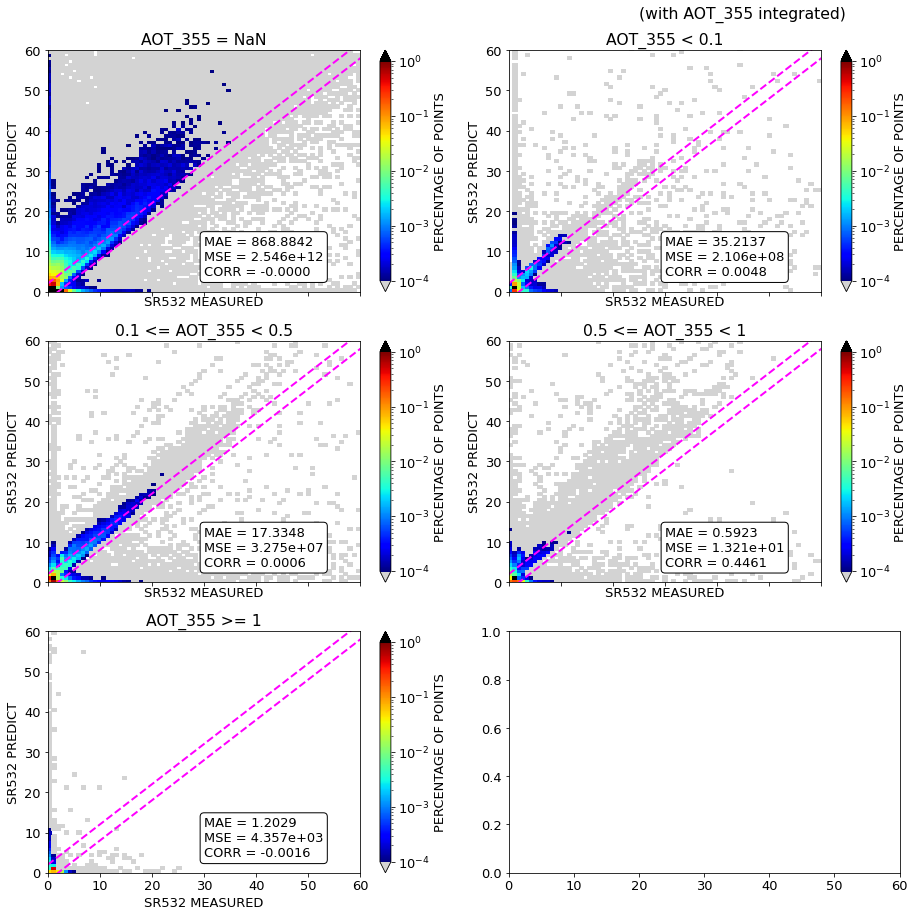

In [268]:
import matplotlib as mpl

plt.clf()
FIG, AXS= plt.subplots(nrows=3, ncols=2, figsize=(13,13), sharex=True)
cmapp = mpl.cm.get_cmap("jet")
cmapp.set_over('black')
cmapp.set_under('lightgrey')
plt.rcParams['font.size'] = 13
# plt.rcParams['xtick.labelsize'] = 'large'
RANGES = [[0, 80], [0, 80]]
BINS = 100
flags = {
    '0' : 'AOT_355 = NaN',
    '1' : 'AOT_355 < 0.1',
    '2' : '0.1 <= AOT_355 < 0.5',
    '3' : '0.5 <= AOT_355 < 1',
    '4' : 'AOT_355 >= 1'
}
for (i, AX), flag in zip(enumerate(AXS.flat), [0,1,2,3,4]):
    #--------------------------------------------------
    # BY FUNCTION
    #--------------------------------------------------
    COUNTS, XBINS, YBINS = np.histogram2d(SR532s[(AOT_355s==flag)].ravel(), SR532_NEWs[(AOT_355s==flag)].ravel(), range = RANGES, bins = BINS)
    COUNTS_PROPA = 100*COUNTS/SR532s.ravel()[~np.isnan(SR532s.ravel())].shape[0]
    PP = AX.pcolormesh(XBINS, YBINS, COUNTS_PROPA.T, cmap = cmapp, norm=LogNorm(vmin=1e-4, vmax=1e0))
    CC = plt.colorbar(PP, ax=AX, label = 'PERCENTAGE OF POINTS', extend='both')
    AX.set_xlabel('SR532 MEASURED')
    AX.set_ylabel('SR532 PREDICT')
    AX.set_title(f'{flags[str(flag)]}')
    AX.plot(np.arange(0,80,1), np.arange(0+2,80+2,1), linestyle='--', c='magenta', linewidth=2)
    AX.plot(np.arange(0,80,1), np.arange(0-2,80-2,1), linestyle='--', c='magenta', linewidth=2)
    AX.set_ylim(0,60)
    AX.set_xlim(0,60)
    #--------------------------------------------------
    # METRICS
    #--------------------------------------------------
    masks = np.logical_and(np.isfinite(SR532s[(AOT_355s==flag)].ravel()), np.isfinite(SR532_NEWs[(AOT_355s==flag)].ravel()))
    if (masks.size != 0) :
        MAE = mean_absolute_error(SR532s[(AOT_355s==flag)].ravel()[masks], SR532_NEWs[(AOT_355s==flag)].ravel()[masks])
        MSE = mean_squared_error(SR532s[(AOT_355s==flag)].ravel()[masks], SR532_NEWs[(AOT_355s==flag)].ravel()[masks])
        R2 = np.corrcoef(SR532s[(AOT_355s==flag)].ravel()[masks], SR532_NEWs[(AOT_355s==flag)].ravel()[masks])

        AX.annotate(f'MAE = {MAE:.4f}\nMSE = {MSE:.3e}\nCORR = {R2[0,1]:.4f}', xy=(30, 4), xytext=(30, 4), bbox=dict(boxstyle="round", fc="w"))

plt.suptitle('(with AOT_355 integrated)', x = 0.8)
plt.tight_layout()

In [87]:
# Etude 22/2 : mettre les AOT : Nan -> 0 si au-dessus AOT Not-Nan, 
# AOT : Nan -> Nan si au dessous les AOT Not-Nan
# Traitement sur l'ensemble des données

MAINDIR = Path('/homedata/nmpnguyen/ORACLES-ER2/Raws')
PARTTERN = f'HSRL2_ER2_*_R8.h5'

AOT_355s = []
AOT_355s_col = []
c = 0
for FILE in sorted(MAINDIR.glob(PARTTERN)):
    print(FILE)
    DATA = xr.open_dataset(FILE, group = 'Nav_Data')
    TIME = DATA['gps_time'].values.flatten()
    DATA = xr.open_dataset(FILE, group = 'DataProducts')
    ALT = DATA['Altitude'].values.flatten()*1e-3
    # 1. Filtrer la position des AOT Not-Nan
    aot355_hi_col = 0; aotp_not_nan = 0
    aot355_hi_col = DATA['355_AOT_hi_col'].values
    aotp_not_nan = np.unique(np.where(~np.isnan(DATA['355_AOT_hi_col'].values))[0])
    # 2. Remplacer les valeurs de AOT_355_hi_col
    for i in aotp_not_nan :
        pmax = np.where(~np.isnan(aot355_hi_col[i]))[0].max()
        aot355_hi_col[i][pmax:]=0

    aot355_hi_col[np.where(np.isnan(aot355_hi_col).all(axis=1))[0],:]=0
    print('nombre des 0 après remplacement:', np.count_nonzero(aot355_hi_col == 0))
    c = c + np.count_nonzero(aot355_hi_col == 0)
    # 3. Append les aot355_hi_col traité (sans flaggé)
    AOT_355s_col.append(aot355_hi_col.ravel())
    
    # 4. Obtenir les AOT_355_hi et append
    AOT_355 = DATA['355_AOT_hi'].values
    print('avant',np.count_nonzero(AOT_355 == 0))
    AOT_355[np.isnan(AOT_355)] = 0
    AOT_355s.append(np.tile(DATA['355_AOT_hi'].values, ALT.shape[0]).ravel())
    print('apres',np.count_nonzero(AOT_355 == 0))
    
    # 3.2. Append les aot355_hi_col traité flaggé
#     aot355_flags = [aot355_hi_col, np.full(aot355_hi_col.shape, 0)]
#     aot355_flags[1][aot355_flags[0] < 0.1] = 1
#     aot355_flags[1][(aot355_flags[0] >= 0.1) & (aot355_flags[0] < 0.5)] = 2
#     aot355_flags[1][(aot355_flags[0] >= 0.5) & (aot355_flags[0] < 1)] = 3
#     aot355_flags[1][aot355_flags[0] > 1] = 4
#     AOT_355s_col.append(aot355_flags[1].ravel())

#     fig, ax = plt.subplots()
#     pcm = ax.pcolormesh(TIME, ALT, aot355_hi_col.T, cmap='turbo', vmin=0, vmax=1.5)
#     plt.colorbar(pcm, ax=ax, label='355_AOT_hi_col Nan=>0')
    
AOT_355s = np.concatenate(AOT_355s)
AOT_355s_col = np.concatenate(AOT_355s_col)

/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160819_R8.h5
nombre des 0 après remplacement: 1265170
avant 0
apres 1281
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160823_R8.h5
nombre des 0 après remplacement: 1663851
avant 0
apres 1181
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160826_R8.h5
nombre des 0 après remplacement: 1403568
avant 0
apres 1916
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160912_R8.h5
nombre des 0 après remplacement: 1492385
avant 0
apres 2046
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160916_R8.h5
nombre des 0 après remplacement: 1530800
avant 0
apres 2069
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160918_R8.h5
nombre des 0 après remplacement: 1830807
avant 0
apres 2631
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160920_R8.h5
nombre des 0 après remplacement: 1646728
avant 0
apres 2395
/homedata/nmpnguyen/ORACLES-ER2/Raws/HSRL2_ER2_20160922_R8.h5
nombre des 0 après remplacement: 1662143
avant 0
apres 2421
/homedata/nmpnguyen/ORAC

<ipython-input-95-6cc24d36054e>:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_over('black')
<ipython-input-95-6cc24d36054e>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_under('lightgrey')


Text(0.5, 0, '355_AOT_hi')

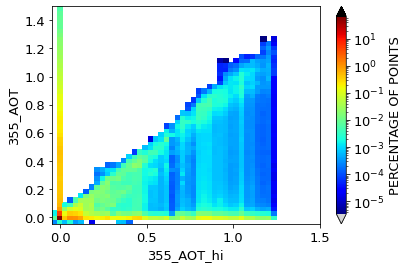

In [95]:
import matplotlib as mpl

FIG, AX = plt.subplots()
cmapp = mpl.cm.get_cmap("jet")
cmapp.set_over('black')
cmapp.set_under('lightgrey')
plt.rcParams['font.size'] = 13
COUNTS, XBINS, YBINS = np.histogram2d(AOT_355s, AOT_355s_col, range=[[-0.05, 1.5], [-0.05, 1.5]], bins=50)
COUNTS_PROPA = 100*COUNTS/AOT_355s_col.shape[0]
PP = AX.pcolormesh(XBINS, YBINS, COUNTS_PROPA.T, cmap = cmapp, norm=LogNorm())
CC = plt.colorbar(PP, ax=AX, label = 'PERCENTAGE OF POINTS', extend='both')
AX.set_ylabel('355_AOT')
AX.set_xlabel('355_AOT_hi')

In [107]:
COUNTS[np.where(XBINS < 0.2)[0],:], np.nanmax(AOT_355s_col), np.nanmax(AOT_355s)

(array([[7.7000000e+01, 2.2530000e+03, 4.5000000e+02, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [8.0000000e+02, 1.9420255e+07, 1.2988600e+06, 2.6574100e+05,
         1.7274700e+05, 1.4795200e+05, 1.3686200e+05, 1.2605300

<ipython-input-80-2368eb78c569>:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_over('black')
<ipython-input-80-2368eb78c569>:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_under('lightgrey')


<Figure size 432x288 with 0 Axes>

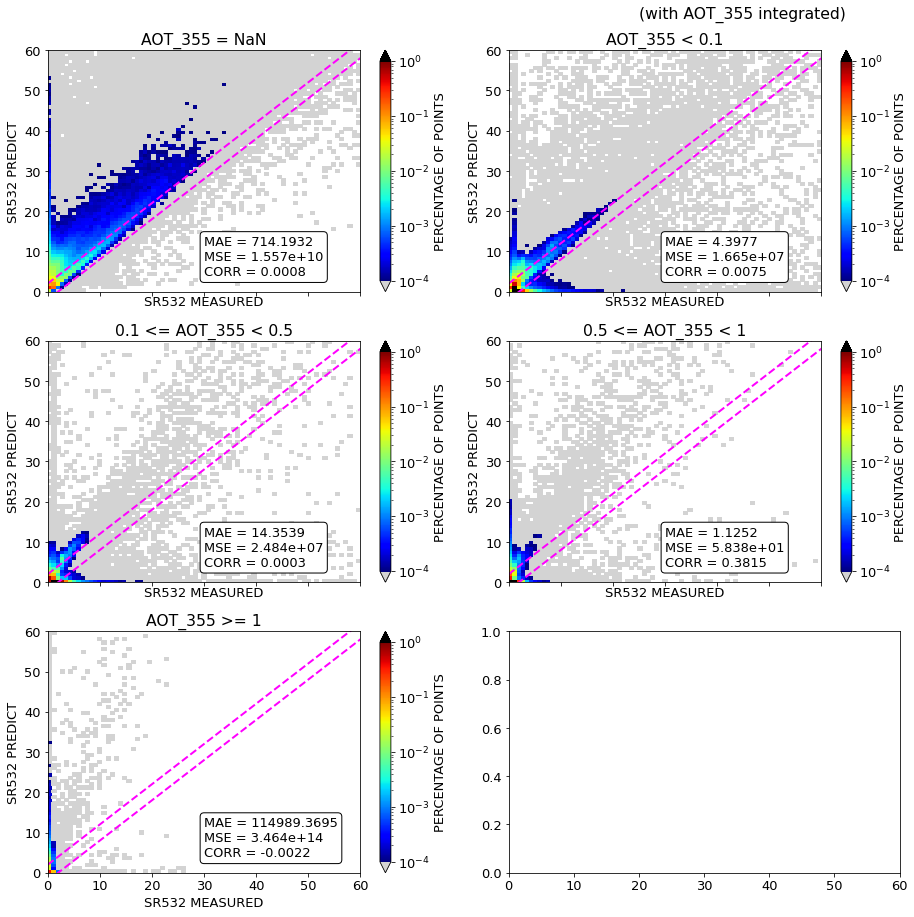

In [80]:
import matplotlib as mpl
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.clf()
FIG, AXS= plt.subplots(nrows=3, ncols=2, figsize=(13,13), sharex=True)
cmapp = mpl.cm.get_cmap("jet")
cmapp.set_over('black')
cmapp.set_under('lightgrey')
plt.rcParams['font.size'] = 13
# plt.rcParams['xtick.labelsize'] = 'large'
RANGES = [[0, 80], [0, 80]]
BINS = 100
flags = {
    '0' : 'AOT_355 = NaN',
    '1' : 'AOT_355 < 0.1',
    '2' : '0.1 <= AOT_355 < 0.5',
    '3' : '0.5 <= AOT_355 < 1',
    '4' : 'AOT_355 >= 1'
}
for (i, AX), flag in zip(enumerate(AXS.flat), [0,1,2,3,4]):
    #--------------------------------------------------
    # BY FUNCTION
    #--------------------------------------------------
    COUNTS, XBINS, YBINS = np.histogram2d(SR532s[(AOT_355s_col==flag)].ravel(), SR532_NEWs[(AOT_355s_col==flag)].ravel(), range = RANGES, bins = BINS)
    COUNTS_PROPA = 100*COUNTS/SR532s.ravel()[~np.isnan(SR532s.ravel())].shape[0]
    PP = AX.pcolormesh(XBINS, YBINS, COUNTS_PROPA.T, cmap = cmapp, norm=LogNorm(vmin=1e-4, vmax=1e0))
    CC = plt.colorbar(PP, ax=AX, label = 'PERCENTAGE OF POINTS', extend='both')
    AX.set_xlabel('SR532 MEASURED')
    AX.set_ylabel('SR532 PREDICT')
    AX.set_title(f'{flags[str(flag)]}')
    AX.plot(np.arange(0,80,1), np.arange(0+2,80+2,1), linestyle='--', c='magenta', linewidth=2)
    AX.plot(np.arange(0,80,1), np.arange(0-2,80-2,1), linestyle='--', c='magenta', linewidth=2)
    AX.set_ylim(0,60)
    AX.set_xlim(0,60)
    #--------------------------------------------------
    # METRICS
    #--------------------------------------------------
    masks = np.logical_and(np.isfinite(SR532s[(AOT_355s_col==flag)].ravel()), np.isfinite(SR532_NEWs[(AOT_355s_col==flag)].ravel()))
    if (masks.size != 0) :
        MAE = mean_absolute_error(SR532s[(AOT_355s_col==flag)].ravel()[masks], SR532_NEWs[(AOT_355s_col==flag)].ravel()[masks])
        MSE = mean_squared_error(SR532s[(AOT_355s_col==flag)].ravel()[masks], SR532_NEWs[(AOT_355s_col==flag)].ravel()[masks])
        R2 = np.corrcoef(SR532s[(AOT_355s_col==flag)].ravel()[masks], SR532_NEWs[(AOT_355s_col==flag)].ravel()[masks])

        AX.annotate(f'MAE = {MAE:.4f}\nMSE = {MSE:.3e}\nCORR = {R2[0,1]:.4f}', xy=(30, 4), xytext=(30, 4), bbox=dict(boxstyle="round", fc="w"))

plt.suptitle('(with AOT_355 integrated)', x = 0.8)
plt.tight_layout()